In [209]:
import os 
import pandas as pd 
import numpy as np 
#reading and filtering out the data
csv_file="raw_Mar31.csv"
raw_rp_data=pd.read_csv(csv_file,index_col=None)

print(raw_rp_data.shape)
print(raw_rp_data.columns)

#filter only videos and valid RP values
rp_data=raw_rp_data.loc[(raw_rp_data != -1).all(axis=1) & raw_rp_data["Filename"].str.endswith(".mp4")].copy()
rp_data.index = pd.RangeIndex(0, len(rp_data))

(11577, 148)
Index(['Filename', 'Advertiser', 'Date', 'Version', 'Country', 'Duration',
       'Description', 'Brand/Product', 'ProductAdvertiser', 'Title',
       ...
       'age_2', 'age_3', 'age_4', 'age_5', 'age_6', 'age_7', 'masculine_faces',
       'feminine_faces', 'video_key_to_match', 'brand_category'],
      dtype='object', length=148)


In [210]:
#extract only the male data 
import ast 
male_cols=[col for col in rp_data.columns if 'male' in col and 'female' not in col]
male_data=rp_data[male_cols]

#create a dataframe with age bins as columns and index as skintone values 

age_bins=['[0, 15)','[15, 25)','[25, 35)','[35, 45)', '[45, 55)','[55, 65)', '[65, 75)']
condensed_age_bins=['[0, 15)','[15, 25)','[25, 35)','[35, 45)','[45, 75)']
skintone_strings=["[-inf, 1.1)","[1.1, 2.1)","[2.1, 3.1)","[3.1, 4.1)","[4.1, 5.1)","[5.1, 6.1)","[6.1, 7.1)","[7.1, 8.1)","[8.1, 9.1)","[9.1, 10.1)"]

male_df=df = pd.DataFrame(0, index=skintone_strings, columns=age_bins)


for age_bin in age_bins:
    
    col_sample=[col for col in male_data.columns if age_bin in col]
    age_subsample_data=male_data[col_sample]
    
    for col_select in col_sample:
        
        tuple_ = tuple(x.strip() for x in col_select.strip('()').split(','))
        skintone_bin=tuple_[3]+", "+tuple_[4]+")"
        sum_faces=male_data[col_select].sum()
        
        male_df.loc[skintone_bin,age_bin]=sum_faces
        #print(male_data[col_select])
        

In [211]:
male_df.sum().sum()

364390

In [212]:
male_df['[45, 75)']=male_df['[45, 55)']+male_df['[55, 65)']+male_df['[65, 75)']

#drop columns from male_df 
male_df=male_df.drop(['[45, 55)', '[55, 65)', '[65, 75)'], axis=1)

In [213]:
male_df

,"[0, 15)","[15, 25)","[25, 35)","[35, 45)","[45, 75)"
"[-inf, 1.1)",1113,5123,12846,2165,593
"[1.1, 2.1)",7307,57257,144218,30820,17326
"[2.1, 3.1)",279,4012,6523,643,256
"[3.1, 4.1)",257,4201,23682,1125,235
"[4.1, 5.1)",845,2041,4663,77,21
"[5.1, 6.1)",76,141,385,0,0
"[6.1, 7.1)",195,646,1771,5,1
"[7.1, 8.1)",673,12991,15782,538,348
"[8.1, 9.1)",4,1233,1908,5,35
"[9.1, 10.1)",0,9,16,0,0


In [214]:
#transpose the dataframe
male_df_transposed=male_df.transpose()

In [215]:
columns_list=list(male_df_transposed.columns)
male_df_transposed

,"[-inf, 1.1)","[1.1, 2.1)","[2.1, 3.1)","[3.1, 4.1)","[4.1, 5.1)","[5.1, 6.1)","[6.1, 7.1)","[7.1, 8.1)","[8.1, 9.1)","[9.1, 10.1)"
"[0, 15)",1113,7307,279,257,845,76,195,673,4,0
"[15, 25)",5123,57257,4012,4201,2041,141,646,12991,1233,9
"[25, 35)",12846,144218,6523,23682,4663,385,1771,15782,1908,16
"[35, 45)",2165,30820,643,1125,77,0,5,538,5,0
"[45, 75)",593,17326,256,235,21,0,1,348,35,0


In [216]:
male_df_transposed['light']=male_df_transposed['[-inf, 1.1)']+male_df_transposed['[1.1, 2.1)']+male_df_transposed['[2.1, 3.1)']
male_df_transposed['medium']=male_df_transposed['[3.1, 4.1)']+male_df_transposed['[4.1, 5.1)']+male_df_transposed['[5.1, 6.1)']+male_df_transposed['[6.1, 7.1)']
male_df_transposed['dark']=male_df_transposed['[7.1, 8.1)']+male_df_transposed['[8.1, 9.1)']+male_df_transposed['[9.1, 10.1)']

#drop the intial list
male_df_hm=male_df_transposed.drop(columns_list,axis=1)

male_df_hm=male_df_hm.transpose()
male_df_hm

,"[0, 15)","[15, 25)","[25, 35)","[35, 45)","[45, 75)"
light,8699,66392,163587,33628,18175
medium,1373,7029,30501,1207,257
dark,677,14233,17706,543,383


In [217]:
total_male_faces=male_df_hm.sum().sum()
male_df_hm=(male_df_hm/total_male_faces)

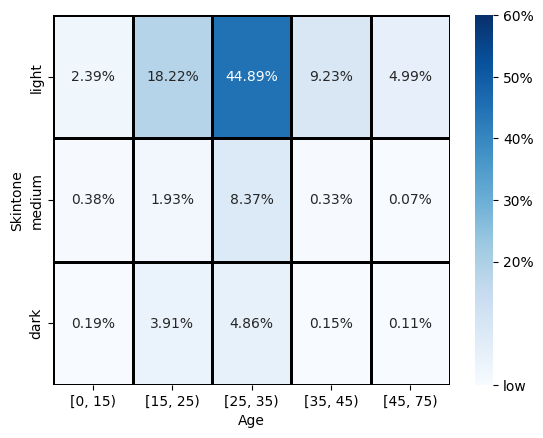

In [218]:

#heatmap plot 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

fig=sns.heatmap(male_df_hm, cmap='Blues',  fmt=".2%", annot=True, linewidths=2, linecolor='black', vmin=0, vmax=0.60)
plt.xlabel('Age')
plt.ylabel('Skintone')
cbar = fig.collections[0].colorbar
cbar.set_ticks([0, .2, .3, .4, .5, .6])
cbar.set_ticklabels(['low', '20%', '30%', '40%', '50%', '60%'])
fig.figure.savefig('plots/male_gender_distribution_heatmap.png',dpi=300)

In [219]:
rp_data['masculine_faces'].sum()

364390

In [220]:
2.39+18.22+44.89+9.23+4.99

79.72

In [221]:
1.93+8.37+0.33+0.07+0.38

11.08

In [222]:
0.19+3.91+4.86+0.15+0.11

9.22

In [223]:
79.72+11.08+9.22

100.02

In [224]:
female_cols=[col for col in rp_data.columns if 'female' in col]
female_data=rp_data[female_cols]

In [225]:
female_df=df = pd.DataFrame(0, index=skintone_strings, columns=age_bins)


for age_bin in age_bins:
    
    col_sample=[col for col in female_data.columns if age_bin in col]
    age_subsample_data=female_data[col_sample]
    
    for col_select in col_sample:
        
        tuple_ = tuple(x.strip() for x in col_select.strip('()').split(','))
        skintone_bin=tuple_[3]+", "+tuple_[4]+")"
        sum_faces=female_data[col_select].sum()
        
        female_df.loc[skintone_bin,age_bin]=sum_faces

In [226]:
female_df

,"[0, 15)","[15, 25)","[25, 35)","[35, 45)","[45, 55)","[55, 65)","[65, 75)"
"[-inf, 1.1)",4263,40503,53936,2387,686,136,0
"[1.1, 2.1)",23636,305761,455215,41539,40260,7957,57
"[2.1, 3.1)",766,20670,30283,1216,467,123,0
"[3.1, 4.1)",1004,34154,36252,6050,3640,227,0
"[4.1, 5.1)",1154,20683,19528,2771,1721,36,0
"[5.1, 6.1)",213,4164,3422,50,14,0,0
"[6.1, 7.1)",647,13454,7772,243,135,1,0
"[7.1, 8.1)",1322,32160,14394,245,107,22,0
"[8.1, 9.1)",53,618,412,1,0,0,0
"[9.1, 10.1)",0,10,4,0,0,0,0


In [227]:
female_df['[45, 75)']=female_df['[45, 55)']+female_df['[55, 65)']+female_df['[65, 75)']

#drop columns from male_df 
female_df=female_df.drop(['[45, 55)', '[55, 65)', '[65, 75)'], axis=1)

In [228]:
female_df

,"[0, 15)","[15, 25)","[25, 35)","[35, 45)","[45, 75)"
"[-inf, 1.1)",4263,40503,53936,2387,822
"[1.1, 2.1)",23636,305761,455215,41539,48274
"[2.1, 3.1)",766,20670,30283,1216,590
"[3.1, 4.1)",1004,34154,36252,6050,3867
"[4.1, 5.1)",1154,20683,19528,2771,1757
"[5.1, 6.1)",213,4164,3422,50,14
"[6.1, 7.1)",647,13454,7772,243,136
"[7.1, 8.1)",1322,32160,14394,245,129
"[8.1, 9.1)",53,618,412,1,0
"[9.1, 10.1)",0,10,4,0,0


In [229]:
female_df_transposed=female_df.transpose()
female_df_transposed['light']=female_df_transposed['[-inf, 1.1)']+female_df_transposed['[1.1, 2.1)']+female_df_transposed['[2.1, 3.1)']
female_df_transposed['medium']=female_df_transposed['[3.1, 4.1)']+female_df_transposed['[4.1, 5.1)']+female_df_transposed['[5.1, 6.1)']+male_df_transposed['[6.1, 7.1)']
female_df_transposed['dark']=female_df_transposed['[7.1, 8.1)']+female_df_transposed['[8.1, 9.1)']+female_df_transposed['[9.1, 10.1)']

#drop the intial list
female_df_hm=female_df_transposed.drop(columns_list,axis=1)

female_df_hm=female_df_hm.transpose()
female_df_hm

,"[0, 15)","[15, 25)","[25, 35)","[35, 45)","[45, 75)"
light,28665,366934,539434,45142,49686
medium,2566,59647,60973,8876,5639
dark,1375,32788,14810,246,129


In [230]:
female_df.sum().sum()

1236544

In [231]:
total_female_faces=rp_data['feminine_faces'].sum()

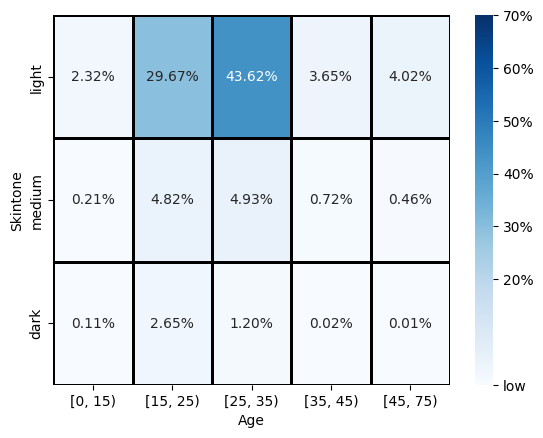

In [232]:
female_df_hm=(female_df_hm/total_female_faces)
fig=sns.heatmap(female_df_hm, cmap='Blues',  fmt=".2%", annot=True, linewidths=2, linecolor='black', vmin=0, vmax=0.70)
plt.xlabel('Age')
plt.ylabel('Skintone')
cbar = fig.collections[0].colorbar
cbar.set_ticks([0, .2, .3, .4, .5, .6, .7])
cbar.set_ticklabels(['low', '20%', '30%', '40%', '50%', '60%', '70%'])
fig.figure.savefig('plots/female_gender_distribution_heatmap.png',dpi=300)